In [144]:
import pandas as pd
import numpy as np

### Functions

In [145]:
def find_min_diff(arr):
    n = len(arr)
    # Initialize difference as infinite
    diff = 10**20
     
    # Find the min diff by comparing difference
    # of all possible pairs in given array
    for i in range(n-1):
        for j in range(i+1,n):
            if abs(arr[i]-arr[j]) < diff:
                diff = abs(arr[i] - arr[j])
 
    # Return min diff
    return diff

### Load dataset

In [146]:
df = pd.read_csv('data/BoardingData.csv', sep=';')

In [147]:
df.head()

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination
0,SAVELII,VIKTOROVICH,RUSANOV,Male,03/10/1983,2879 096860,FRNINO,6625956945991971,Transit,2017-03-22,06:05,SU1369,Own,Moscow
1,LEV,MARKOVICH,ISAEV,Male,12/13/1975,1788 173211,Not presented,1643715499224676,Registered,2017-03-18,22:10,SU1180,Own,Volgograd
2,NIKOLAI,I.,NIKOLSKII,Male,12/26/1990,4396 926588,VWNYGF,6247422701565929,Transit,2017-03-18,22:10,SU1180,Own,Volgograd
3,ANATOLII,PETROVICH,SHILOV,Male,05/24/1997,2595 919752,WQFFUE,Not presented,Registered,2017-03-18,22:10,SU1180,Own,Volgograd
4,MIROSLAVA,VIACHESLAVOVNA,SEMENOVA,Female,01/31/1976,6775 516990,Not presented,Not presented,Registered,2017-03-12,11:45,SU6284,Own,Moscow


### Создаем поле содержащее уникальный идентификатор пассажира(паспорт) и дату

In [159]:
unique_field = "Passenger_by_day"

# Документ + дата
df[unique_field] = df["PassengerDocument"] + ' ' + df["FlightDate"]

df.head()

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination,Passenger_by_day
0,SAVELII,VIKTOROVICH,RUSANOV,Male,03/10/1983,2879 096860,FRNINO,6625956945991971,Transit,2017-03-22,06:05,SU1369,Own,Moscow,2879 096860 2017-03-22
1,LEV,MARKOVICH,ISAEV,Male,12/13/1975,1788 173211,Not presented,1643715499224676,Registered,2017-03-18,22:10,SU1180,Own,Volgograd,1788 173211 2017-03-18
2,NIKOLAI,I.,NIKOLSKII,Male,12/26/1990,4396 926588,VWNYGF,6247422701565929,Transit,2017-03-18,22:10,SU1180,Own,Volgograd,4396 926588 2017-03-18
3,ANATOLII,PETROVICH,SHILOV,Male,05/24/1997,2595 919752,WQFFUE,Not presented,Registered,2017-03-18,22:10,SU1180,Own,Volgograd,2595 919752 2017-03-18
4,MIROSLAVA,VIACHESLAVOVNA,SEMENOVA,Female,01/31/1976,6775 516990,Not presented,Not presented,Registered,2017-03-12,11:45,SU6284,Own,Moscow,6775 516990 2017-03-12


In [167]:
df[df['PassengerDocument'].isnull()]

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination,Passenger_by_day


In [160]:
df1 = df.groupby(by=[unique_field]).count()
df2 = df1[df1["PassengerSex"] > 1]
one_day_psg = list(df2.index)

one_day_psg

[]

### Создаем поле содержащее уникальный идентификатор пассажира(ФИО + дата рождения) и дату

In [169]:
# ФИО + дата + день рождения
df[unique_field] = df["PassengerLastName"] + ' ' + df["PassengerFirstName"] + \
' '+ df["PassengerSecondName"] + ' ' +  df["FlightDate"] + ' ' + df["PassengerBirthDate"] 

df.head()

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination,Passenger_by_day
0,SAVELII,VIKTOROVICH,RUSANOV,Male,03/10/1983,2879 096860,FRNINO,6625956945991971,Transit,2017-03-22,06:05,SU1369,Own,Moscow,RUSANOV SAVELII VIKTOROVICH 2017-03-22 03/10/1983
1,LEV,MARKOVICH,ISAEV,Male,12/13/1975,1788 173211,Not presented,1643715499224676,Registered,2017-03-18,22:10,SU1180,Own,Volgograd,ISAEV LEV MARKOVICH 2017-03-18 12/13/1975
2,NIKOLAI,I.,NIKOLSKII,Male,12/26/1990,4396 926588,VWNYGF,6247422701565929,Transit,2017-03-18,22:10,SU1180,Own,Volgograd,NIKOLSKII NIKOLAI I. 2017-03-18 12/26/1990
3,ANATOLII,PETROVICH,SHILOV,Male,05/24/1997,2595 919752,WQFFUE,Not presented,Registered,2017-03-18,22:10,SU1180,Own,Volgograd,SHILOV ANATOLII PETROVICH 2017-03-18 05/24/1997
4,MIROSLAVA,VIACHESLAVOVNA,SEMENOVA,Female,01/31/1976,6775 516990,Not presented,Not presented,Registered,2017-03-12,11:45,SU6284,Own,Moscow,SEMENOVA MIROSLAVA VIACHESLAVOVNA 2017-03-12 0...


In [170]:
df[df['PassengerBirthDate'].isnull()]

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination,Passenger_by_day


In [171]:
df1 = df.groupby(by=[unique_field]).count()
df2 = df1[df1["PassengerSex"] > 1]
one_day_psg = list(df2.index)

one_day_psg

[]

### Создаем поле содержащее уникальный идентификатор пассажира(ФИО) и дату

In [172]:
# ФИО + дата + день рождения
df[unique_field] = df["PassengerLastName"] + ' ' + df["PassengerFirstName"] + \
' '+ df["PassengerSecondName"] + ' ' +  df["FlightDate"]

df.head()

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination,Passenger_by_day
0,SAVELII,VIKTOROVICH,RUSANOV,Male,03/10/1983,2879 096860,FRNINO,6625956945991971,Transit,2017-03-22,06:05,SU1369,Own,Moscow,RUSANOV SAVELII VIKTOROVICH 2017-03-22
1,LEV,MARKOVICH,ISAEV,Male,12/13/1975,1788 173211,Not presented,1643715499224676,Registered,2017-03-18,22:10,SU1180,Own,Volgograd,ISAEV LEV MARKOVICH 2017-03-18
2,NIKOLAI,I.,NIKOLSKII,Male,12/26/1990,4396 926588,VWNYGF,6247422701565929,Transit,2017-03-18,22:10,SU1180,Own,Volgograd,NIKOLSKII NIKOLAI I. 2017-03-18
3,ANATOLII,PETROVICH,SHILOV,Male,05/24/1997,2595 919752,WQFFUE,Not presented,Registered,2017-03-18,22:10,SU1180,Own,Volgograd,SHILOV ANATOLII PETROVICH 2017-03-18
4,MIROSLAVA,VIACHESLAVOVNA,SEMENOVA,Female,01/31/1976,6775 516990,Not presented,Not presented,Registered,2017-03-12,11:45,SU6284,Own,Moscow,SEMENOVA MIROSLAVA VIACHESLAVOVNA 2017-03-12


In [175]:
df1 = df.groupby(by=[unique_field]).count()
df2 = df1[df1["PassengerSex"] > 1]
one_day_psg = list(df2.index)

one_day_psg

['AGEEV ARTUR A. 2017-02-04',
 'BABUSHKIN KONSTANTIN A. 2017-02-18',
 'BASOVA VITALINA A. 2017-01-18',
 'BAZHENOV ALEKSEI A. 2017-01-18',
 'BORODINA IANA A. 2017-03-08',
 'BULATOVA LILIIA D. 2017-01-02',
 'FILIMONOV MIKHAIL S. 2017-01-25',
 'GLADKOVA REGINA M. 2017-02-14',
 'GOLIKOVA LILIIA A. 2017-02-06',
 'GOROKHOV IAROMIR A. 2017-01-01',
 'GREKOVA MIROSLAVA A. 2017-01-19',
 'KASATKINA NADEZHDA R. 2017-04-08',
 'KHROMOVA KIRA R. 2017-01-08',
 'KORNEVA VASILINA S. 2017-01-08',
 'KOVALEVA NATALIA AMIROVNA 2017-01-30',
 'KOZLOV RUSTAM S. 2017-01-13',
 'KULIKOV MAKAR I. 2017-01-01',
 'MEDVEDEV TAMERLAN NIKITICH 2017-01-06',
 'MOROZOVA STEFANIIA G. 2017-01-16',
 'MUKHINA NATALIIA SAVELEVNA 2017-01-09',
 'NOVIKOVA NATASHA V. 2017-03-02',
 'OVSIANNIKOV IAROMIR V. 2017-02-23',
 'PANTELEEV GRIGORII A. 2017-01-01',
 'ROZHKOV MIRON A. 2017-01-05',
 'SOMOVA SOFIIA A. 2017-01-05',
 'SPIRIDONOV GERMAN ARTEMICH 2017-02-22',
 'TRETIAKOV ARTEM I. 2017-03-08',
 'TROSHINA SNEZHANA M. 2017-03-01',
 'VOR

### Находим варианты с меньшей разницей во времени

In [176]:
df3 = df[df[unique_field].isin(one_day_psg)]
df4 = df3[[unique_field, 'FlightTime']]
df4

,Passenger_by_day,FlightTime
1079,BORODINA IANA A. 2017-03-08,13:20
1750,TROSHINA SNEZHANA M. 2017-03-01,21:10
1997,BORODINA IANA A. 2017-03-08,16:20
4248,FILIMONOV MIKHAIL S. 2017-01-25,07:35
5161,VOROBEVA OLESIA I. 2017-02-24,13:10
...,...,...
146044,BAZHENOV ALEKSEI A. 2017-01-18,08:05
150869,PANTELEEV GRIGORII A. 2017-01-01,03:10
151230,VOROBEVA OLESIA I. 2017-02-24,22:30
151348,SPIRIDONOV GERMAN ARTEMICH 2017-02-22,10:00


In [177]:
shortest_diff_list = []

for item in df4[unique_field].unique():
    hours = []
    dfx = df4[df4[unique_field] == item]
    for time in dfx['FlightTime']:
        hour = time.split(':')[0]
        hours.append(int(hour))
    shortest_diff_list.append((item, find_min_diff(hours)))

shortest_diff_list = sorted(shortest_diff_list, key=lambda tup: tup[1])
shortest_diff_list

[('GLADKOVA REGINA M. 2017-02-14', 1),
 ('PANTELEEV GRIGORII A. 2017-01-01', 1),
 ('NOVIKOVA NATASHA V. 2017-03-02', 2),
 ('BASOVA VITALINA A. 2017-01-18', 2),
 ('BORODINA IANA A. 2017-03-08', 3),
 ('BULATOVA LILIIA D. 2017-01-02', 3),
 ('MUKHINA NATALIIA SAVELEVNA 2017-01-09', 3),
 ('ZAVIALOVA OLGA I. 2017-01-23', 3),
 ('SOMOVA SOFIIA A. 2017-01-05', 4),
 ('ROZHKOV MIRON A. 2017-01-05', 4),
 ('TRETIAKOV ARTEM I. 2017-03-08', 4),
 ('KOVALEVA NATALIA AMIROVNA 2017-01-30', 4),
 ('AGEEV ARTUR A. 2017-02-04', 4),
 ('MOROZOVA STEFANIIA G. 2017-01-16', 5),
 ('BABUSHKIN KONSTANTIN A. 2017-02-18', 6),
 ('GOROKHOV IAROMIR A. 2017-01-01', 6),
 ('VORONINA KSENIIA ARSENEVNA 2017-01-18', 6),
 ('KASATKINA NADEZHDA R. 2017-04-08', 6),
 ('GOLIKOVA LILIIA A. 2017-02-06', 7),
 ('FILIMONOV MIKHAIL S. 2017-01-25', 8),
 ('KHROMOVA KIRA R. 2017-01-08', 8),
 ('KULIKOV MAKAR I. 2017-01-01', 8),
 ('TROSHINA SNEZHANA M. 2017-03-01', 9),
 ('VOROBEVA OLESIA I. 2017-02-24', 9),
 ('BAZHENOV ALEKSEI A. 2017-01-18', 

In [180]:
for item in sorted_by_second:
    print(item)
    dfx = df[df['Passenger_by_day'] == item]

('GLADKOVA REGINA M. 2017-02-14', 1)
('PANTELEEV GRIGORII A. 2017-01-01', 1)
('NOVIKOVA NATASHA V. 2017-03-02', 2)
('BASOVA VITALINA A. 2017-01-18', 2)
('BORODINA IANA A. 2017-03-08', 3)
('BULATOVA LILIIA D. 2017-01-02', 3)
('MUKHINA NATALIIA SAVELEVNA 2017-01-09', 3)
('ZAVIALOVA OLGA I. 2017-01-23', 3)
('SOMOVA SOFIIA A. 2017-01-05', 4)
('ROZHKOV MIRON A. 2017-01-05', 4)
('TRETIAKOV ARTEM I. 2017-03-08', 4)
('KOVALEVA NATALIA AMIROVNA 2017-01-30', 4)
('AGEEV ARTUR A. 2017-02-04', 4)
('MOROZOVA STEFANIIA G. 2017-01-16', 5)
('BABUSHKIN KONSTANTIN A. 2017-02-18', 6)
('GOROKHOV IAROMIR A. 2017-01-01', 6)
('VORONINA KSENIIA ARSENEVNA 2017-01-18', 6)
('KASATKINA NADEZHDA R. 2017-04-08', 6)
('GOLIKOVA LILIIA A. 2017-02-06', 7)
('FILIMONOV MIKHAIL S. 2017-01-25', 8)
('KHROMOVA KIRA R. 2017-01-08', 8)
('KULIKOV MAKAR I. 2017-01-01', 8)
('TROSHINA SNEZHANA M. 2017-03-01', 9)
('VOROBEVA OLESIA I. 2017-02-24', 9)
('BAZHENOV ALEKSEI A. 2017-01-18', 9)
('GREKOVA MIROSLAVA A. 2017-01-19', 11)
('MEDV

In [184]:
df_diff = pd.DataFrame.from_records(sorted_by_second, columns=['Passenger_and_date', 'diff'])

In [188]:
dfx = df_diff[df_diff['diff'] < 4]

In [190]:
dfx

,Passenger_and_date,diff
0,GLADKOVA REGINA M. 2017-02-14,1
1,PANTELEEV GRIGORII A. 2017-01-01,1
2,NOVIKOVA NATASHA V. 2017-03-02,2
3,BASOVA VITALINA A. 2017-01-18,2
4,BORODINA IANA A. 2017-03-08,3
5,BULATOVA LILIIA D. 2017-01-02,3
6,MUKHINA NATALIIA SAVELEVNA 2017-01-09,3
7,ZAVIALOVA OLGA I. 2017-01-23,3


array([[<AxesSubplot:title={'center':'diff'}>]], dtype=object)

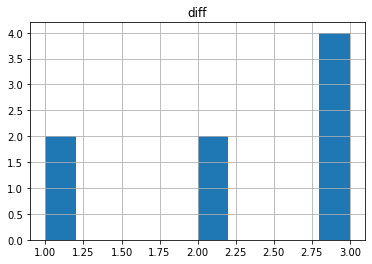

In [189]:
dfx.hist()

In [179]:
df[df['Passenger_by_day'] == 'GLADKOVA REGINA M. 2017-02-14']

,PassengerFirstName,PassengerSecondName,PassengerLastName,PassengerSex,PassengerBirthDate,PassengerDocument,BookingCode,TicketNumber,Baggage,FlightDate,FlightTime,FlightNumber,CodeShare,Destination,Passenger_by_day
44729,REGINA,M.,GLADKOVA,Female,06/25/1973,3493 630589,YJLQYQ,4409005197484507,Delayed,2017-02-14,07:00,SU1436,Own,Yekaterinburg,GLADKOVA REGINA M. 2017-02-14
95827,REGINA,M.,GLADKOVA,Female,08/13/2000,7226 203406,EVDCFV,6008370744581238,Transit,2017-02-14,08:00,SU5611,Own,Vladivostok,GLADKOVA REGINA M. 2017-02-14


#### После проверки выявляем, что это разные люди, так как даты рождения не совпадают